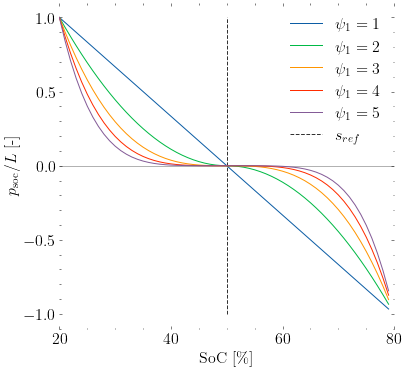

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import sys
sys.path.append('../..')
from mtfunc.helper import *
hour=60
day=24*hour
C=96 #kWh
Cdev=1
soc_lim=np.array([20,80])
p_bat_lim=1*C #1C 
p_std=p_bat_lim
soc_std=soc_lim[1]-soc_lim[0]# do not change unless necesary
soc_ref=(soc_lim[1]+soc_lim[0])/2
soc_softc=[32,80]
dt=1
def p_soc_lim(soc,g):
    dsoc=soc_ref-soc
    if dsoc>0:
        return (abs(dsoc)/soc_std*2)**g
    else:
        return -(abs(dsoc)/soc_std*2)**g
soc=np.arange(20,80)

with plt.style.context('science'):
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(figsize=(6,6))
    for g in np.arange(1,6):
        psoc=list(map(p_soc_lim,soc,g*np.ones_like(soc)))
        ax.plot(soc,psoc,label=f'$\psi_1={g}$')
    ax.set_ylabel(r'$p_{\text{soc}}/L$ [-]')
    ax.vlines(soc_ref,-1,1,'k',alpha=0.8,linestyle='--',label='$s_{ref}$')
    ax.hlines(0,20,80,'k',alpha=0.3,linestyle='-')    
    ax.set_xlabel(r'SoC [\%]')    
    ax.set_xlim([20,80]) 
    for pos in ['right', 'top', 'bottom', 'left']:
        ax.spines[pos].set_visible(False)
    ax.legend()
    ax.locator_params(nbins=5)
    plt.savefig('/users/adrianpaeckelripoll/MT/PPT figures/p_soc_lim.pdf')
    plt.show()